In [ ]:
#############################################
# NETFLIX SHOWS DATASET
#############################################
# This dataset consists of TV Shows and Movies available on Netflix as of 2019.

###############
# VARIABLES
###############
# show_id: Unique ID for every Movie / Tv Show
# type: Identifier - A Movie or TV Show
# title: Title of the Movie / Tv Show
# director: Director of the Movie/Show
# cast: Actors involved in the movie / show
# country: Country where the movie / show was produced
# date_added: Date it was added on Netflix
# release_year: Actual Release year of the movie / show
# rating: TV Rating of the movie / show (target group)
# duration: Total Duration - in minutes or number of seasons
# listed_in: Genre
# description: Summary description of the film/show

In [ ]:
##################
# 1. GENEL RESİM
##################
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv")

In [ ]:
df.head()

In [ ]:
df.shape
# 7787 adet gözlem birimi ve 12 değişkenli bir veri seti.

In [ ]:
df.info()
# Yalnızca release_year değişkeni sayısal.
# Mevcut durumda veri setinde 11 adet kategorik, 1 adet sayısal değişken bulunuyor.

In [ ]:
df.nunique()
# Her bir değişkendeki eşsiz veri sayısına bakmak için kullandık.

In [ ]:
df.isnull().sum()
# Her bir değişkendeki boş veri sayısına bakmak için kullandık.
# director değişkeninde 2389 adet,
# cast değişkeninde 718 adet,
# country değişkeninde 507 adet,
# date_added değişkeninde 10 adet ve
# rating değişkeninde 7 adet boş veri olduğu görülmüştür.

In [ ]:
df.isnull().sum().sort_values(ascending=False)
# Boş veri sayısını azalan şekilde sıraladık.

In [ ]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)
# Her bir değişkendeki eksiklik yüzdesini görmek için yazdık.

In [ ]:
# 11 ve 12.satırda yapılan işlemleri fonskiyonlaştırmak ve 
# boş veri barındıran değişkenleri daha derli toplu görmek için:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

In [ ]:
###################################
# 2. EKSİK VERİ PROBLEMİNİ ÇÖZME
###################################
# missing_values_table fonksiyonu çıktısında elde ettiğimiz boş veri barındıran değişkenler için:

        # cast: cast değişkeni çok fazla farklı bilgi barındırıyor. Analiz için bu bilgiye ihtiyacım
        #       olmadığından veri setinden bu değişkeni direkt çıkaracağım.
        # director: Direktör değişkeninde kısmen eksik veri var ancak direktörler özelinde bir analiz
        #       yapmayacağımdan bu değişkeni de veri setinden çıkaracağım.
        # country: country değişkeni analiz için kritik olabilir. Bu nedenle mode kullanarak
        #       eksik verileri doldurabiliriz.
        # date_added: 10 tane eksik veri var. Aslında eksik veri sayısı az olduğundan doğrudan silme
        #       işlemini de yapabiliriz ama mode ile doldurmayı tercih edeceğim.
        # rating: 7 tane eksik veri var. Yine doğrudan silme işlemini yapabiliriz ama mode ile
        #       doldurmayı tercih edeceğim.


In [ ]:
# Yukarıda 15. satırda bahsedilen değişiklikleri sırasıyla uygularsak:
df = df.drop(["cast"], axis=1)
df.columns

In [ ]:
df = df.drop(["director"], axis=1)
df.columns

In [ ]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [ ]:
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])

In [ ]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [ ]:
df.isnull().sum() # Böylece artık değişkenlerde eksik veri olmadığını görüyoruz.
df.shape
# Eksik veri problemini çözdükten sonra veri setinde 7787 adet gözlem birimi ve 10 adet değişken bulunuyor.
# Böylece veri kaybetmeden eksikleri doldurmuş olduk. Başlanıç gözlem birimi sayımız da 7787 adetti,
# değişken sayısı 12'den 10'a düşmüş oldu.

In [ ]:
################################
# 3. DEĞİŞKENLERİ GÜNCELLEME
################################

# 1. date_added değişkeninin güncellenmesi:
# date_added değişkenindeki gün bilgisini kullanmayacağım için yalnızca yıl ve ay değerlerini tutacağım.
# Böylece release_year değişkeninde olduğu gibi Netflix'e eklendiği yıl ve ay bilgilerini ayrı ayrı değişkenlerde tutmuş olacağım.
df["date_added"] = pd.to_datetime(df['date_added'])
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month_name()
df = df.drop(["date_added"], axis=1)
df.columns
df.dtypes
df.head()

In [ ]:
# 2. country değişkeninin güncellenmesi:
# country değişkeni ilgili Film ya da Dizinin çekildiği ülke/ülkeleri temsil etmekte.
# Birden fazla ülke değeri barındıran gözlem birimeri için ilk yazan ülkeyi alacağım.
df["country"].value_counts()
df["country_first"] = df["country"].apply(lambda x: x.split(",")[0])
df.head()
df = df.drop(["country"], axis=1)
df.head()

In [ ]:
# 3. rating değişkeninin güncellenmesi:
# Veri setindeki rating değişkeni aslında beklendiğinin aksine Film/Dizi puanlamasını değil,
# hitap ettiği izleyici kitlesine yönelik bir sınıflandırmayı ifade etmekte.
# rating değişkeni bu hali ile bakıldığında anlamlandırılamadığından bir "rating_map" ile güncelleyeceğim.
df["rating"].nunique()
df["rating"].value_counts()

In [ ]:
# TV-G ile G aynı izleyici kitlesine hitap etmekte. Her ikisi de "Genel İzleyici" kitlesini
# temsil ettiğinden veri setinde ayrı iki grup görünmemesi adına düzeltiyorum.
df["rating"] = df["rating"].replace(["G"], "TV-G")
df["rating"].value_counts() # Artık G adında bir izleyici kitlesi yok. Tamamı TV-G olarak yer alyor.

In [ ]:
# Aynı şekilde TV-PG ile PG aynı izleyici kitlesine hitap etmekte. Her ikisi de
# "Ebeveyn rehberliği önerilir" kategorisine ait olduğundan veri setinde ayrı iki grup görünmemesi adına düzeltiyorum.
df["rating"] = df["rating"].replace(["PG"], "TV-PG")
df["rating"].value_counts() # Artık PG adında bir izleyici kitlesi yok. Tamamı TV-PG olarak yer alyor.

In [ ]:
# Son olarak, NR ile UR aynı anlamı taşımakta. NR = Not Rated, UR = Unrated anlamında kullanıldığından
# veri setinde ayrı iki grup görünmemesi adına düzeltiyorum.
df["rating"] = df["rating"].replace(["UR"], "NR")
df["rating"].value_counts() # Artık UR adında bir izleyici kitlesi yok. Tamamı NR olarak yer alyor.

In [ ]:
rating_map = {
    "TV-Y": "All Children",
    "TV-Y7": "Very Young Children",
    "TV-Y7-FV": "Older Children",
    "TV-G": "General Audience",
    "TV-PG": "Parental Guidance Suggested",
    "TV-14": "Teens",
    "PG-13": "Teens",
    "TV-MA": "Mature Audience Only",
    "NC-17": "Adults",
    "R": "Restricted",
    "NR": "Not Rated",
}

df["rating_definitions"] = df["rating"].replace(rating_map)
df.head()

In [ ]:
df["rating_definitions"].value_counts()

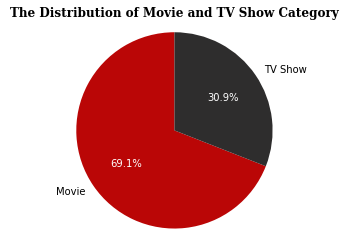

In [ ]:
#############################
# 4. HİPOTEZLER
#############################
# Hipotezlere başlamadan önce genel bir bakış sağlaması adına type değişkeninde yer alan "Movie"
# kategorisindeki program sayısı ile "TV Show" kategorisindeki program sayısı arasındaki dağılımı
# pie-chart ile netleştirebiliriz.

df["type"].nunique()
df["type"].value_counts()

labels = "Movie", "TV Show"
sizes = [df["type"].value_counts()[0], df["type"].value_counts()[1]]

fig1, ax1 = plt.subplots()
colors = ["#ba0606", "#2e2d2d"]
patches, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color("black")
for autotext in autotexts:
    autotext.set_color('white')
ax1.axis("equal")
plt.title(label="The Distribution of Movie and TV Show Category",
          loc="center",
          fontweight="bold",
          fontfamily="serif")
plt.show()


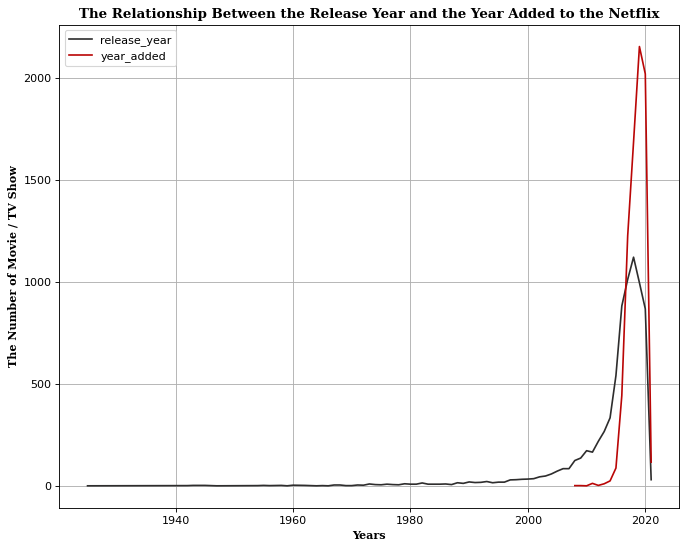

In [ ]:
# Soru 1. Programların çıkış yılı(release_year) ile Netflix'e eklendiği yıl(year_added) arasında
# bir ilişki var mıdır?

figure(figsize=(10, 8), dpi=80)
x = df.groupby(["release_year"])["show_id"].count()
y = df.groupby(["year_added"])["show_id"].count()
plt.title("The Relationship Between the Release Year and the Year Added to the Netflix", fontweight="bold", fontfamily="serif")
plt.xlabel("Years", fontweight="bold", fontfamily="serif")
plt.ylabel("The Number of Movie / TV Show", fontweight="bold", fontfamily="serif")
plt.plot(x, color="#2e2d2d")
plt.plot(y, color="#ba0606")
plt.grid()
plt.legend(["release_year", "year_added"], loc="upper left")
plt.show()

In [ ]:
# Şirketin teknolojik dönüşüm anlamında yaptığı en büyük atılım 2007 yılında kurduğu online platform ile
# olmuştur. Bu tarihten itibaren internet üzerinden yayın hayatına başlayan şirket,
# günümüz Netflix modelinin de ilk adımını atmıştır. Bu süreçte bilgisayarlar artık her eve girmiş
# ve kargo işinin süreci uzattığını düşünen Netflix “watch instantly” sloganıyla internet sitesinden
#yayın yapmaya başlamıştır.

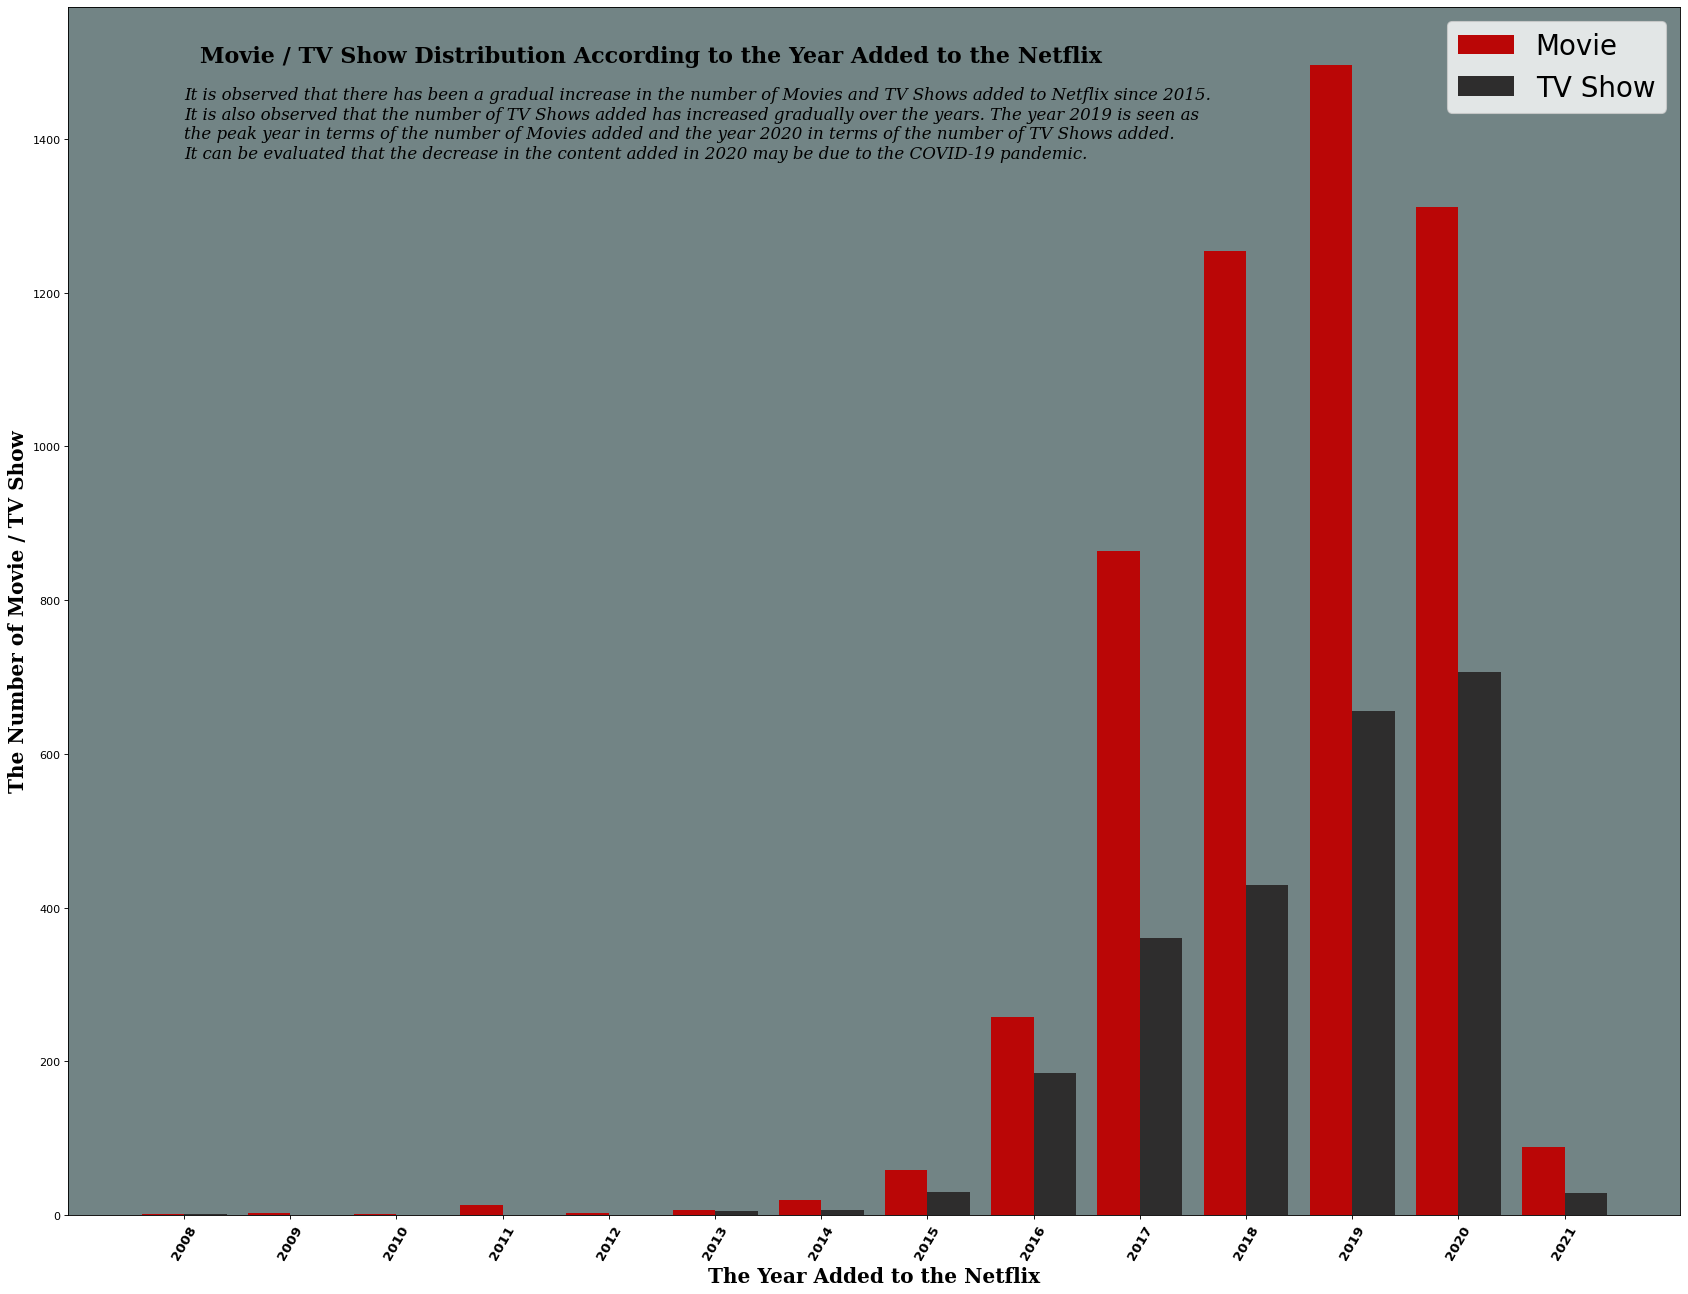

In [ ]:
# Soru 2. Netflix’e eklendiği yıllara göre Film / Dizi program sayısı dağılımı nasıldır?

df["year_added"].value_counts()
years = df["year_added"].unique()
np.sort(years)
df_netflix_added = df.groupby(["year_added", "type"]).agg({"show_id": "count"})
df_netflix_added_2 = df_netflix_added.reset_index()
df_netflix_added_2[df_netflix_added_2["type"] == "Movie"]["show_id"]
df_netflix_added_2[df_netflix_added_2["type"] == "TV Show"]["show_id"]

figure(figsize=(26, 20), dpi=80)
y1 = df_netflix_added_2[df_netflix_added_2["type"] == "Movie"]["show_id"]
y2 = [1, 0, 0, 0, 0, 5, 6, 30, 185, 361, 430, 656, 707, 29]
x = np.arange(14)
width = 0.40
ax = plt.axes()
ax.set_facecolor("#728485")
plt.bar(x - 0.2, y1, width, color="#ba0606")
plt.bar(x + 0.2, y2, width, color="#2e2d2d")
plt.xticks(x, np.sort(years))
plt.xticks(rotation=60, fontweight="bold", fontsize=12)
plt.xlabel("The Year Added to the Netflix", fontweight="bold", fontsize=18, fontfamily="serif")
plt.ylabel("The Number of Movie / TV Show", fontweight="bold", fontsize=18, fontfamily="serif")
plt.legend().set_visible(False)
plt.text(0.15, 1500, "Movie / TV Show Distribution According to the Year Added to the Netflix",
         fontsize=20,
         fontweight="bold",
         fontfamily="serif")
plt.text(0.0015, 1350,
'''
It is observed that there has been a gradual increase in the number of Movies and TV Shows added to Netflix since 2015.
It is also observed that the number of TV Shows added has increased gradually over the years. The year 2019 is seen as
the peak year in terms of the number of Movies added and the year 2020 in terms of the number of TV Shows added.
It can be evaluated that the decrease in the content added in 2020 may be due to the COVID-19 pandemic.
''', fontsize=15, fontweight="light", fontfamily="serif", style="italic")
plt.legend(["Movie", "TV Show"], fontsize=25)
plt.show()

In [ ]:
# 2014 yılı itibarıyla Netflix’e eklenen Dizi sayılarında kademeli bir artış söz konusu olmuş ve en fazla
# Dizi platforma 2020 yılında eklenmiştir. Netflix, Filmlerde olduğundan farklı olarak tek seferlik izleme
# ile Filmin tamamlanmasının aksine, Dizi programlarının yapısı gereği sezonlara bağlı olarak ilerlemesiyle
# daha fazla izleyiciyi platforma bağlı tutmaya yıllar içinde önem vermiş olabilir. En fazla eklenen
# Film sayısı 2019 yılında olmuş, akabinde 2020 yılında eklenen Film sayısındaki azalma COVID-19 pandemisine
# bağlı olabilir. 2021 yılında veri sayısının yeterli olmaması nedeniyle değerlendirmeye alınması
#uygun değildir.

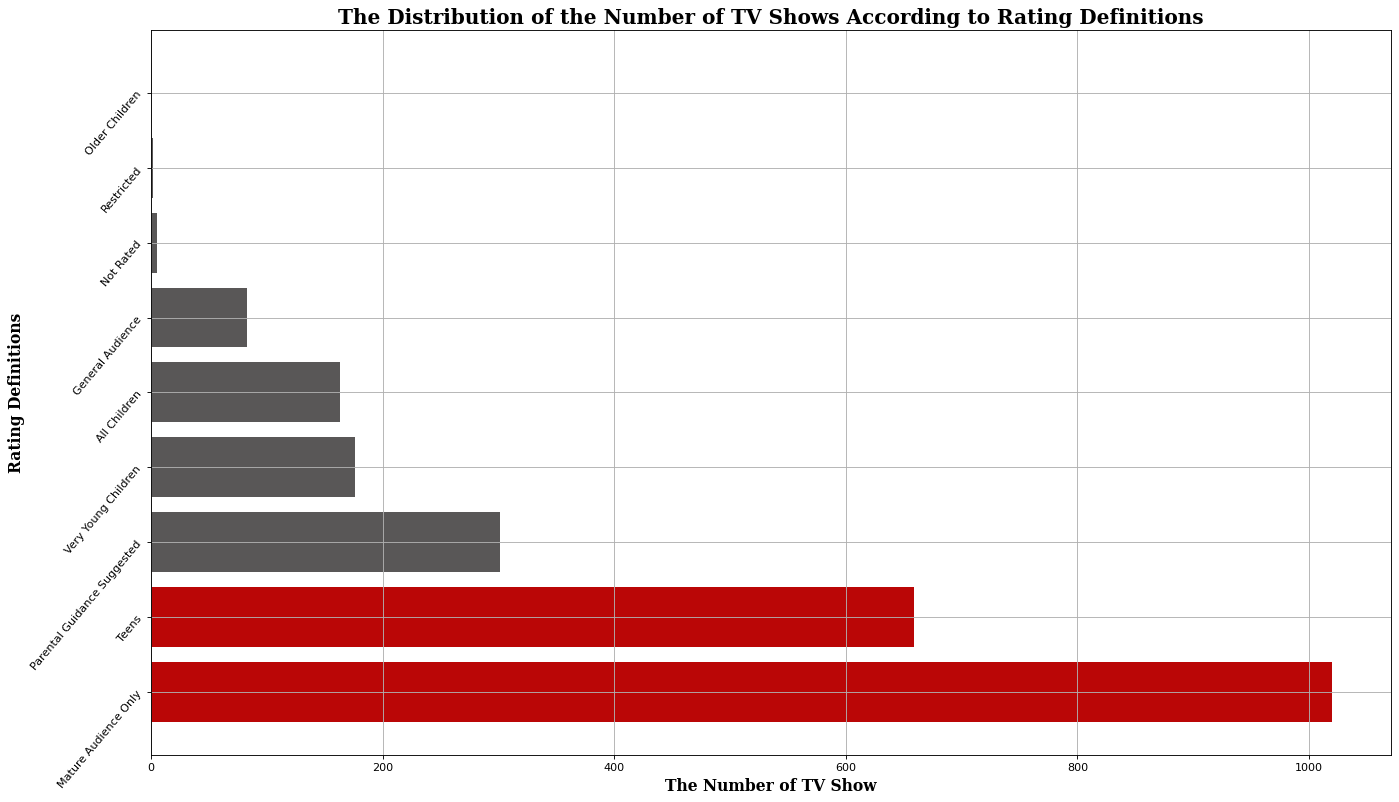

In [ ]:
# Soru 3. Eklenen TV Show sayısının yıllar içinde arttığı göz önünde bulundurulursa,
# TV Show özeline hedef izleyici kitlesi dağılımı nasıldır?

df2 = df.loc[df["type"] == "TV Show", ["type", "show_id", "rating_definitions"]]
df3 = df2.groupby(["type", "rating_definitions"]).agg({"show_id": "count"}).sort_values("show_id", ascending=False)
df4 = df3.reset_index()

figure(figsize=(20, 12), dpi=80)
y = df4["rating_definitions"]
x = df4["show_id"]
plt.yticks(rotation=50)
plt.barh(y, x, color=["#ba0606", "#ba0606", "#595757", "#595757", "#595757", "#595757", "#595757", "#595757", "#595757", "#595757"])
plt.ylabel("Rating Definitions", fontweight="bold", fontsize=14, fontfamily="serif")
plt.xlabel("The Number of TV Show", fontweight="bold", fontsize=14, fontfamily="serif")
plt.title("The Distribution of the Number of TV Shows According to Rating Definitions", fontweight="bold", fontsize=18, fontfamily="serif")
# plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# Netflix’in özellikle “Yetişkin İzleyici” ve “Genç İzleyici” kitlesini hedef almış gibi görünüyor.
# Bu sayede, genel izleyici kitlesine ya da çocuklara hitap etmektense platforma daha fazla bağlı
# tutabileceği spesifik bir izleyici kitlesine hitap etmek bir pazarlama stratejisi olarak düşünülmüş olabilir. 

Int64Index([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2], dtype='int64')


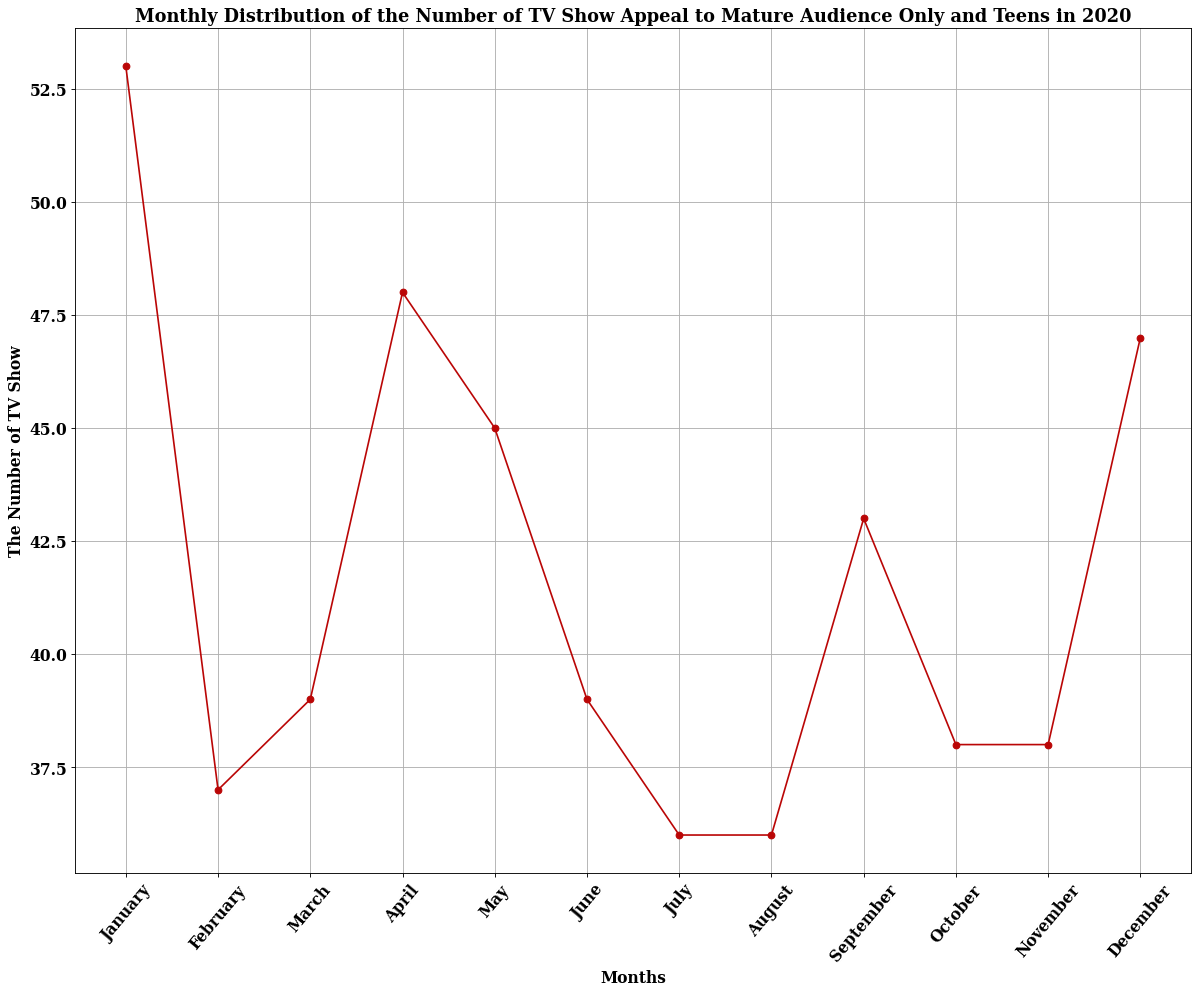

In [ ]:
# Soru 4. Eklenen Dizi sayısının en fazla 2020 yılında olduğu gözleminden yola çıkılarak,
# 2020 yılında “Yetişkin İzleyici” ve “Genç İzleyici” kitlesine hitap eden Dizi sayısının aylara göre
# dağılımı nasıldır?
df["month_added"].value_counts() # 12 ay boyunca her ay program eklenmiş. Boş geçilen ay yok.

df.head()
df_2020 = df.loc[df["year_added"] == 2020, ["type", "show_id", "month_added", "rating_definitions"]]
df2_2020 = df_2020.loc[(df_2020["type"] == "TV Show")
                       & ((df_2020["rating_definitions"] == "Mature Audience Only") | (df_2020["rating_definitions"] == "Teens")),
                       ["type", "show_id", "month_added", "rating_definitions"]]

df3_2020 = df2_2020.groupby("month_added").agg({"show_id": "count"})
df4_2020 = df3_2020.reset_index()
df4_2020["show_id"]

dff = pd.DataFrame({"month_added": ["April", "August", "December", "February", "January", "July", "June", "March", "May", "November", "October", "September"],
                    "program_number": df4_2020["show_id"]})

month_dict = {"January": 1,
              "February": 2,
              "March": 3,
              "April": 4,
              "May": 5,
              "June": 6,
              "July": 7,
              "August": 8,
              "September": 9,
              "October": 10,
              "November": 11,
              "December": 12}

y = dff.sort_values("month_added", key=lambda x: x.apply(lambda x: month_dict[x]))
print(y.index)
y2 = y.reset_index()

figure(figsize=(18, 14), dpi=80)
y = y2["program_number"]
x = y2["month_added"]
plt.plot(x, y, marker="o", color="#ba0606")
plt.xticks(fontweight="bold", fontsize=14, fontfamily="serif", rotation=50)
plt.yticks(fontweight="bold", fontsize=14, fontfamily="serif")
plt.title("Monthly Distribution of the Number of TV Show Appeal to Mature Audience Only and Teens in 2020", fontweight="bold", fontsize=16, fontfamily="serif")
plt.xlabel("Months", fontweight="bold", fontsize=14, fontfamily="serif")
plt.ylabel("The Number of TV Show", fontweight="bold", fontsize=14, fontfamily="serif")
plt.grid()
plt.show()